In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df=df.drop('model',axis=1)

In [4]:
x = df.drop(['mpg','disp'],axis=1)
y = df.mpg

In [5]:
import statsmodels.api as sm
x_constant = sm.add_constant(x)
lr = sm.OLS(y,x_constant).fit()
lr.summary()

C:\Users\ADMIN\MEGHA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     15.73
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.18e-07
Time:                        16:14:47   Log-Likelihood:                -70.274
No. Observations:                  32   AIC:                             160.5
Df Residuals:                      22   BIC:                             175.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5505     18.526      0.677      0.505     -25.870      50.971
cyl            0.0963      0.997      0.097      0.924      -1.972       2.164
hp            -0.0129      0.018     -0.706      0.488      -0.051       0.025
drat           0.9286      1.608      0.578      0.569      -2.406       4.263
wt            -2.6269      1.198     -2.193      0.039      -5.111      -0.142
qsec           0.6652      0.693      0.959      0.348      -0.773       2.103
vs             0.1604      2.073      0.077      0.939      -4.138       4.459
am             2.4788      2.035      1.218      0.236      -1.742       6.699
gear           0.7430      1.474      0.504      0.619      -2.313       3.799
carb          -0.6169      0.606     -1.018      0.320      -1.873       0.639
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.227
Skew:                           0.405   Prob(JB):                        0.541
Kurtosis:                       2.486   Cond. No.                     6.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=x.columns)

,vif
cyl,14.284737
hp,7.123361
drat,3.329298
wt,6.189050
qsec,6.914423
vs,4.916053
am,4.645108
gear,5.324402
carb,4.310597


# SQRT Transform

In [7]:
df1 = df.transform(lambda x : np.sqrt(x))

In [8]:
x = df1.drop(['mpg','disp'],axis=1)
y = df1.mpg
x_constant = sm.add_constant(x)

In [9]:
lr.resid.mean()

1.4712675522332574e-12

In [10]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(lr.resid,dist='norm',plot=plt)
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
fitted_values = lr.predict()

Text(0.5, 1.0, 'Predicted vs Actual')

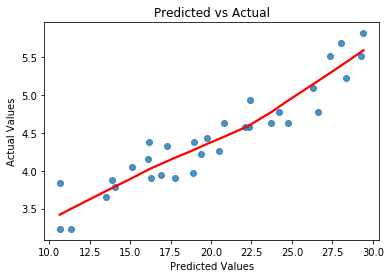

In [12]:
import seaborn as sns
sns.regplot(x = fitted_values, y = y, lowess= True, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')

Text(0.5, 1.0, 'Predicted vs Actual')

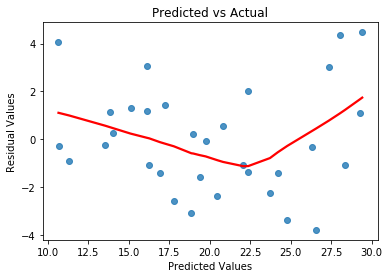

In [13]:
sns.regplot(x = fitted_values, y =lr.resid, lowess= True, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Predicted vs Actual')

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_constant.values,i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=x.columns)

,vif
cyl,13.593017
hp,8.142157
drat,3.811151
wt,8.270341
qsec,8.434492
vs,4.860606
am,4.881642
gear,5.767645
carb,5.048500


# Log Transform

In [16]:
df2 = df.transform(lambda x : np.log(x))

C:\Users\ADMIN\MEGHA\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,3.044522,1.791759,5.075174,4.700480,1.360977,0.963174,2.800933,-inf,0.0,1.386294,1.386294
1,3.044522,1.791759,5.075174,4.700480,1.360977,1.056053,2.834389,-inf,0.0,1.386294,1.386294
2,3.126761,1.386294,4.682131,4.532599,1.348073,0.841567,2.923699,0.0,0.0,1.386294,0.000000
3,3.063391,1.791759,5.552960,4.700480,1.124930,1.167827,2.967333,0.0,-inf,1.098612,0.000000
4,2.928524,2.079442,5.886104,5.164786,1.147402,1.235471,2.834389,-inf,-inf,1.098612,0.693147


# Log Transform cannot be applied as we get 'inf' values

# Inverse Transform

In [18]:
df3 = df.transform(lambda x : (1/x))
df3.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.047619,0.166667,0.006250,0.009091,0.256410,0.381679,0.060753,inf,1.0,0.250000,0.25
1,0.047619,0.166667,0.006250,0.009091,0.256410,0.347826,0.058754,inf,1.0,0.250000,0.25
2,0.043860,0.250000,0.009259,0.010753,0.259740,0.431034,0.053735,1.0,1.0,0.250000,1.00
3,0.046729,0.166667,0.003876,0.009091,0.324675,0.311042,0.051440,1.0,inf,0.333333,1.00
4,0.053476,0.125000,0.002778,0.005714,0.317460,0.290698,0.058754,inf,inf,0.333333,0.50


# Inverse Transform cannot be applied as we get 'inf' values

# Exponential Transform

In [19]:
df4 = df.transform(lambda x : np.exp(x))
df4.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1.318816e+09,403.428793,3.069850e+69,5.920972e+47,49.402449,13.735724,1.407626e+07,1.000000,2.718282,54.598150,54.598150
1,1.318816e+09,403.428793,3.069850e+69,5.920972e+47,49.402449,17.725424,2.464292e+07,1.000000,2.718282,54.598150,54.598150
2,7.978370e+09,54.598150,8.013164e+46,2.451246e+40,46.993063,10.175674,1.208427e+08,2.718282,2.718282,54.598150,2.718282
3,1.967442e+09,403.428793,1.116802e+112,5.920972e+47,21.758402,24.903292,2.771308e+08,2.718282,1.000000,20.085537,2.718282
4,1.322229e+08,2980.957987,2.218265e+156,1.003539e+76,23.336065,31.186958,2.464292e+07,1.000000,1.000000,20.085537,7.389056


In [20]:
x = df4.drop(['mpg','disp'],axis=1)
y = df4.mpg
x_constant = sm.add_constant(x)
LR2 = sm.OLS(y,x_constant).fit()
LR2.summary()

C:\Users\ADMIN\MEGHA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ADMIN\MEGHA\lib\site-packages\statsmodels\regression\linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
C:\Users\ADMIN\MEGHA\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\ADMIN\MEGHA\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ADMIN\MEGHA\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ADMIN\MEGHA\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                      -0.052
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 28 Jan 2020   Prob (F-statistic):                nan
Time:                        16:15:14   Log-Likelihood:                -1075.6
No. Observations:                  32   AIC:                             2153.
Df Residuals:                      31   BIC:                             2155.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      1.102e-283          0        inf      0.000    1.1e-283    1.1e-283
cyl                 0          0        nan        nan           0           0
hp         1.061e-139  3.16e-132   3.36e-08      1.000  -6.44e-132   6.44e-132
drat        4.64e-282          0        inf      0.000   4.64e-282   4.64e-282
wt         4.642e-282          0        inf      0.000   4.64e-282   4.64e-282
qsec       4.363e-275          0        inf      0.000   4.36e-275   4.36e-275
vs         1.931e-283          0        inf      0.000   1.93e-283   1.93e-283
am         1.872e-283          0        inf      0.000   1.87e-283   1.87e-283
gear        5.85e-282          0        inf      0.000   5.85e-282   5.85e-282
carb       1.407e-281          0        inf      0.000   1.41e-281   1.41e-281
==============================================================================
Omnibus:                       72.228   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.568
Skew:                           5.027   Prob(JB):                    1.54e-199
Kurtosis:                      27.199   Cond. No.                    2.76e+153
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Train Test for SQRT Transformed Data

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [23]:
LR.score(x_train,y_train)

0.004033951055454343

In [24]:
LR.score(x_test,y_test)

-0.185505293937833

In [25]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mse)
print(mae,mse,RMSE)

67771269388657.98 2.9304039799374304e+28 171184227659484.75


# Train Test for Original Data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [27]:
LR1 = LinearRegression()
LR1.fit(x_train,y_train)
y_pred = LR1.predict(x_test)

In [28]:
LR1.score(x_train,y_train)

0.004033951055454343

In [29]:
LR1.score(x_test,y_test)

-0.185505293937833

In [30]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mse)
print(mae,mse,RMSE)

67771269388657.98 2.9304039799374304e+28 171184227659484.75


from pylab import *

plt.subplots(figsize=(15,8))
subplot(1,2,1)
sns.boxplot(df.mpg)
subplot(1,2,2)
sns.distplot(df.mpg,kde=False)
show()

# Feature Selection

In [31]:
import pandas as pd
import numpy as npp
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


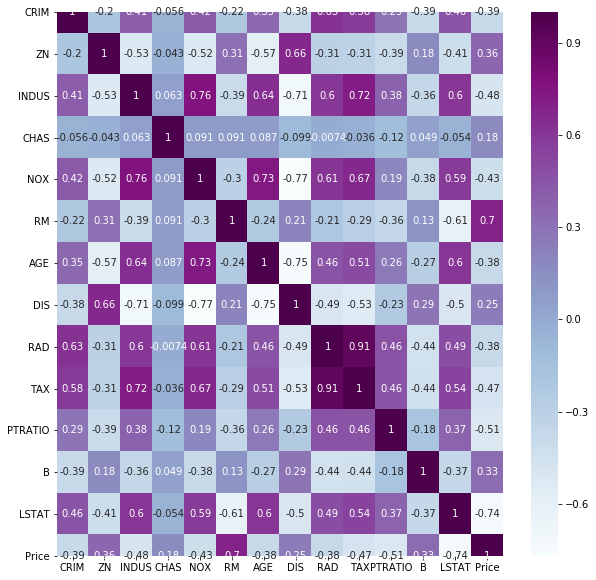

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(bos.corr(),annot=True,cmap='BuPu')

In [35]:
corr = bos.corr()
target_corr = abs(corr["Price"])
final_features = target_corr[target_corr>0.5]
final_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

# Now we need to check for Multi Collinearity

In [36]:
cor1 = bos[['RM','PTRATIO']].corr()
cor1

,RM,PTRATIO
RM,1.000000,-0.355501
PTRATIO,-0.355501,1.000000


## Clearly the RM and PTRATIO are not collinear and hence can be kept

In [37]:
cor2 = bos[['RM','LSTAT']].corr()
cor2

,RM,LSTAT
RM,1.000000,-0.613808
LSTAT,-0.613808,1.000000


## Clearly the RM and LSTAT are collinear and hence we check the corr of them wrt Price .. least corr will be removed

In [38]:
df = pd.DataFrame(bos[['LSTAT','PTRATIO','Price']])
df.head()

,LSTAT,PTRATIO,Price
0,4.98,15.3,24.0
1,9.14,17.8,21.6
2,4.03,17.8,34.7
3,2.94,18.7,33.4
4,5.33,18.7,36.2


# OLS Method

In [39]:
x = bos.drop('Price',axis=1)
y = bos.Price

In [40]:
import statsmodels.api as sm

x_constant = sm.add_constant(x)
lr = sm.OLS(y,x_constant).fit()
lr.summary()

C:\Users\ADMIN\MEGHA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        16:15:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [43]:
LR.score(x_train,y_train)

0.7103879080674731

In [44]:
LR.score(x_test,y_test)

0.7836295385076268

In [45]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mse)
print(mae,mse,RMSE)

3.3446655035987582 19.831323672063345 4.453237437198172


# 1. Forward Selection
# 2. Backward ELimination
# 3. Recursive Feature Elimination

## Backward Elimination - Checks for the p-val and selects features

In [46]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
df.shape

(506, 3)

In [48]:
import statsmodels.api as sm
cols = list(df.columns)
pmax = 1 
while(len(cols)>0):
    p = []
    x = bos[cols]
    x_constant = sm.add_constant(x)
    lr = sm.OLS(y,x_constant).fit()
    p = pd.Series(lr.pvalues.values[1:],index=cols)
    pmax = max(p)
    feature_wit_max_p = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_wit_max_p)
    else:
        break
selected_features = cols
selected_features

C:\Users\ADMIN\MEGHA\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['LSTAT', 'PTRATIO', 'Price']

# Recursive Feature Elimination - Works on R square

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression()

In [50]:
# Initializing RFE Model
x = bos.drop('Price',axis=1)
y = bos.Price

rfe = RFE(lr,5)
# Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)
# Fitting the data to model
lr.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True False False  True False
 False]
[4 6 5 1 1 1 9 1 3 7 1 8 2]


In [51]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split

In [53]:
num_ls = np.arange(1,14)
num = 0
high_score = 0
score_list = []
for i in range(len(num_ls)):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
    LR = LinearRegression()
    rfe = RFE(LR,num_ls[i])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    LR.fit(x_train_rfe,y_train)
    score = LR.score(x_test_rfe,y_test)
    print(rfe.support_)
    print(rfe.ranking_)
    print(score)
    if(score>high_score):
        high_score = score
        num = num_ls[i]
print("The highest r score is {}".format(high_score))
print("{} number of features give the best score of {}".format(num,high_score))

[False False False False  True False False False False False False False
 False]
[ 7  9 12  3  1  2 11  5  8 10  4 13  6]
0.17771860345328638
[False False False False  True  True False False False False False False
 False]
[ 6  8 11  2  1  1 10  4  7  9  3 12  5]
0.47468329405597215
[False False False  True  True  True False False False False False False
 False]
[ 5  7 10  1  1  1  9  3  6  8  2 11  4]
0.5083778622385811
[False False False  True  True  True False False False False  True False
 False]
[ 4  6  9  1  1  1  8  2  5  7  1 10  3]
0.5050323653332086
[False False False  True  True  True False  True False False  True False
 False]
[3 5 8 1 1 1 7 1 4 6 1 9 2]
0.5359834100900924
[False False False  True  True  True False  True False False  True False
  True]
[2 4 7 1 1 1 6 1 3 5 1 8 1]
0.6407589788474839
[ True False False  True  True  True False  True False False  True False
  True]
[1 3 6 1 1 1 5 1 2 4 1 7 1]
0.6393236650194685
[ True False False  True  True  True False  True  

In [54]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
